# G-Research Data Engineering Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]

The dataset you'll be working with is a subset of our Kaggle G-Research Crypto Forecasting Challenge: https://www.kaggle.com/c/g-research-crypto-forecasting, where teams worked totgether to predict prices to win $125,000!

Here we won't be trying to predict crypto prices, but we'll be trying to visualise this data and try and pull out interesting information from this dataset.

## 1. Intro to Pandas
First, we'll go through some basics with Pandas. If you don't know Python, and would rather do this in a language you're comfortable in, or use Excel, you can skip to Section 2

In Pandas, we mainly work with dataframes. A Pandas dataframe is the equivalent of an Excel spreadsheet. Pandas dataframes — just like Excel spreadsheets — have 2 dimensions or axes.

A dataframe has rows and columns (also known as series). On top of a dataframe, you will see the name of the columns and on the left side, there’s the index. For now, we'll ignore this, and simply think of it as a way to access a row

The intersection of a row and a column is called a data value or simply data. We can store different types of data such as integers, strings, boolean, and so on.

### Creating a a dataframe

The first thing we'll demonstrate is how to create a dataframe. For this we can load data from our data files. In our data files, we have a file containing information about London Underground and other lines. The following line, opens this file into Python, and stores the dataframe in a variable called `df`

In [2]:
df = pd.read_csv('data/tubes.csv')

If we simply type `df` then Jupyter will display to us a nice table with the data in the Dataframe.
Unfortunately, it is not as flexible as Excel, where you can interact with the tabele with a mouse 

In [3]:
df

,Line,Opening Year,No Of Stations
0,Bakerloo,1906,25
1,Central,1900,49
2,Circle,1871,36
3,District,1868,60
4,Hammersmith & City,1864,29
5,Jubilee,1979,27
6,Metropolitan,1863,34
7,Northern,1890,52
8,Piccadilly,1906,53
9,Victoria,1968,16


hf.hist()

Another powerful feature of pandas is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'No Of Stations'}>]], dtype=object)

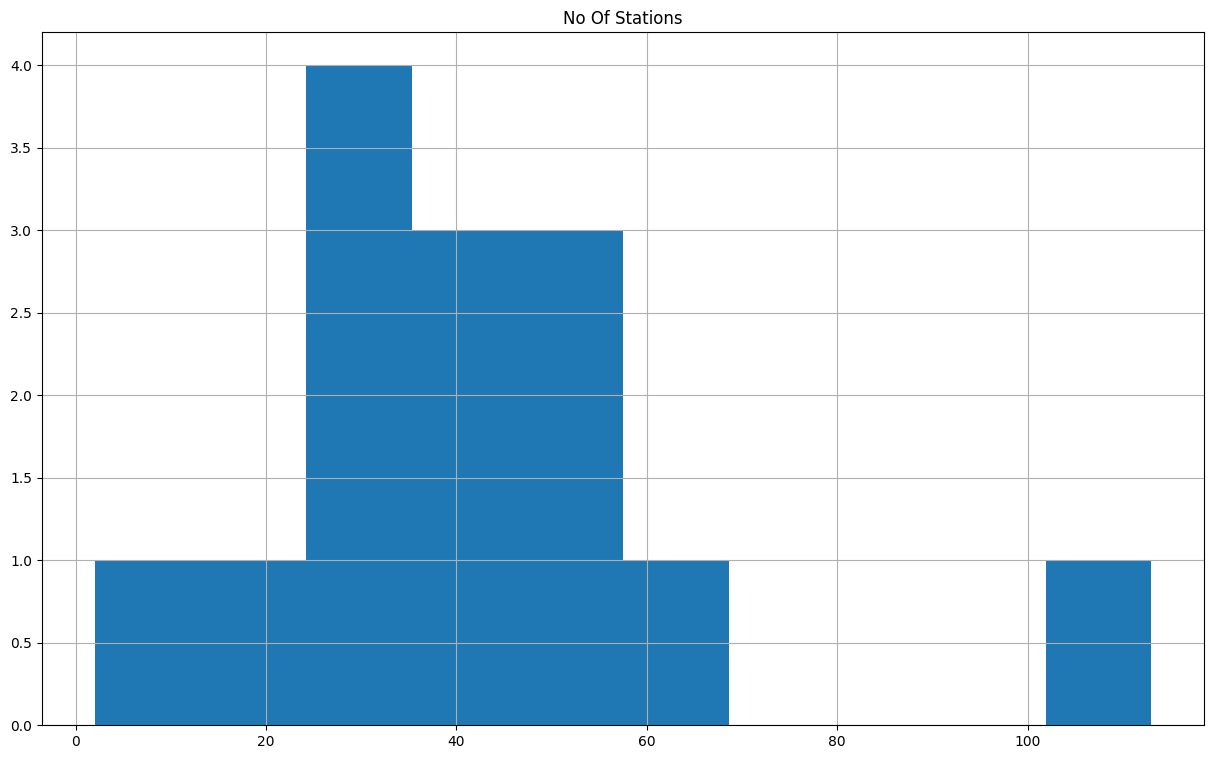

In [4]:
df.hist('No Of Stations')

### Accessing Data
You can access DataFrame data using familiar Python dict/list operations.

The following row, shows you how to specify a specific column.

In [5]:
df['Opening Year']

0     1906
1     1900
2     1871
3     1868
4     1864
5     1979
6     1863
7     1890
8     1906
9     1968
10    1898
11    2022
12    1987
13    2007
Name: Opening Year, dtype: int64

You can also specify a specific row, as shown below.

`df.loc[]` tells pandas to give you the row at a specific index. 

In [6]:
df.loc[0]

Line              Bakerloo
Opening Year          1906
No Of Stations          25
Name: 0, dtype: object

Unfortunately, this requires you to know specific row number for each row, so we won't use this much.

If we go back to columns, we can answer a lot of fun questions.


e.g. What is the most number of stations a line has in London?

In [7]:
df['No Of Stations'].max()

113

Or, what is the average number of stations a line in London has?

In [8]:
df['No Of Stations'].mean()

41.57142857142857

Or, what are the counts of unique line names?

In [9]:
df['Line'].value_counts()

Line
Bakerloo                   1
Central                    1
Circle                     1
District                   1
Hammersmith & City         1
Jubilee                    1
Metropolitan               1
Northern                   1
Piccadilly                 1
Victoria                   1
Waterloo&City              1
Elizabeth                  1
Docklands Light Railway    1
London Overground          1
Name: count, dtype: int64

Okay, that one was a bit obvious, but it will be useful for later

### Filtering Data

Let's say we wanted to get all of the tube lines which opened since 2000.
In Excel, you could use a filter. Here, we have to say this in code.

Pandas has a weird syntax for specifiying a filter.

```
    df[
        (expression)
    ]
```

The `(expression)` part has to be logical expression.
e.g. A > 0, or A == "Hello", or even (A/5)*100 < 2

Where A is a column.

*Note: while A is a column, this expression will be applied to all rows*

E.g. if we wanted to get all of the tube lines which opened since 2000. We'd write
```
    df[
        df['Opening Year'] > 2000
    ]
```


To make it more obvious, we'll split this code over two lines



In [10]:
df[
    df['Opening Year'] > 2000
]

,Line,Opening Year,No Of Stations
11,Elizabeth,2022,41
13,London Overground,2007,113


Or by number of stations

In [11]:
df[
    df['No Of Stations'] < 20
]

,Line,Opening Year,No Of Stations
9,Victoria,1968,16
10,Waterloo&City,1898,2


Or even lines with the word "city" in them 

In [12]:
df[
    df['Line'].str.contains('City')
]

,Line,Opening Year,No Of Stations
4,Hammersmith & City,1864,29
10,Waterloo&City,1898,2


We can also assign this filtered data to another variable if we want it later

In [13]:
cityLines = df[
    df['Line'].str.contains('City')
]

In [14]:
cityLines

,Line,Opening Year,No Of Stations
4,Hammersmith & City,1864,29
10,Waterloo&City,1898,2


## Graphing Data

Pandas allows you to generate simple graphs with the `.plot` function.
By default, 

You can specify what x and y axis you want by giving column names

<Axes: xlabel='Line'>

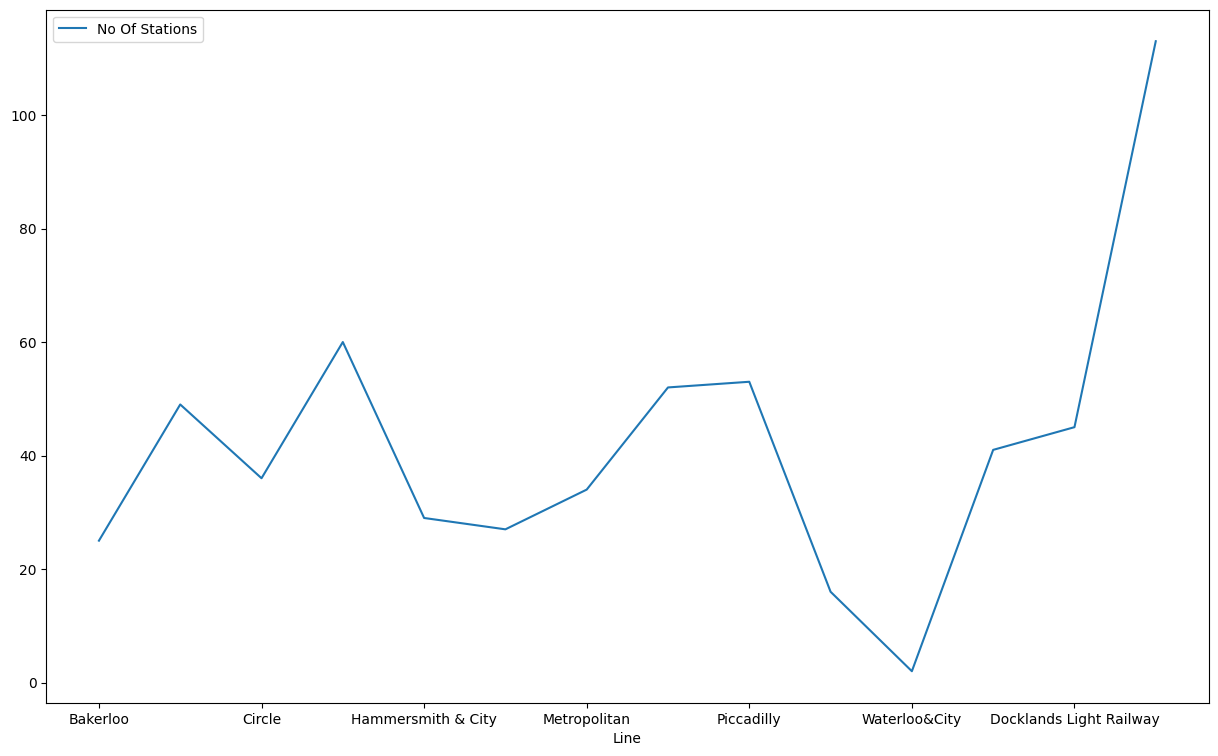

In [15]:
df.plot(x="Line", y="No Of Stations")

This looks wrong, we should be using a bar chart instead, since there's not a relationship between the lines.


We can add `kind='bar'` to the code

<Axes: xlabel='Line'>

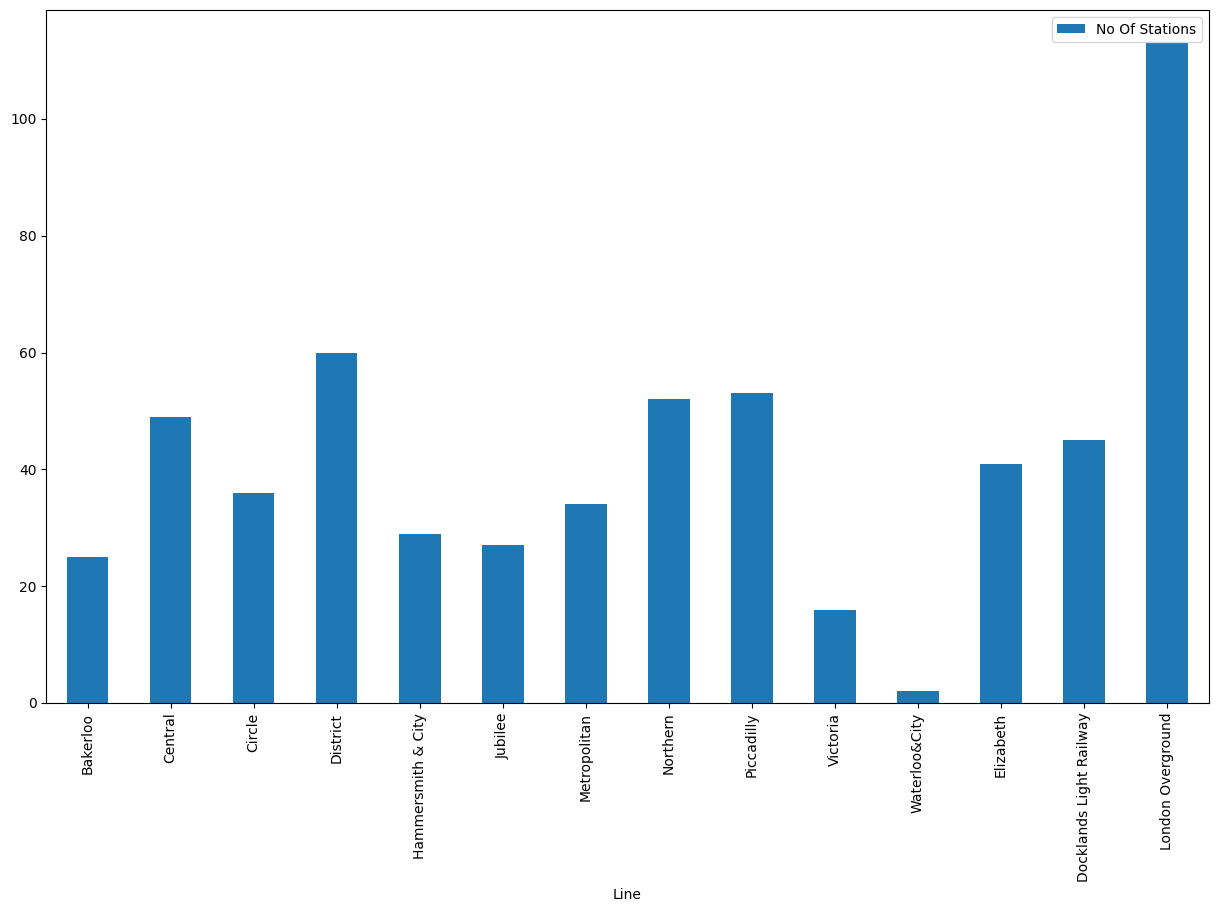

In [16]:
df.plot(kind='bar', x="Line", y="No Of Stations")

The `kind` parameter accepts eleven different string values and determines which kind of plot you’ll create:

1. "area" is for area plots.
2. "bar" is for vertical bar charts.
3. "barh" is for horizontal bar charts.
4. "box" is for box plots.
5. "hexbin" is for hexbin plots.
6. "hist" is for histograms.
7. "kde" is for kernel density estimate charts.
8. "density" is an alias for "kde".
9. "line" is for line graphs.
10. "pie" is for pie charts.
11. "scatter" is for scatter plots.

Let's try `barh` to flip this graph

<Axes: ylabel='Line'>

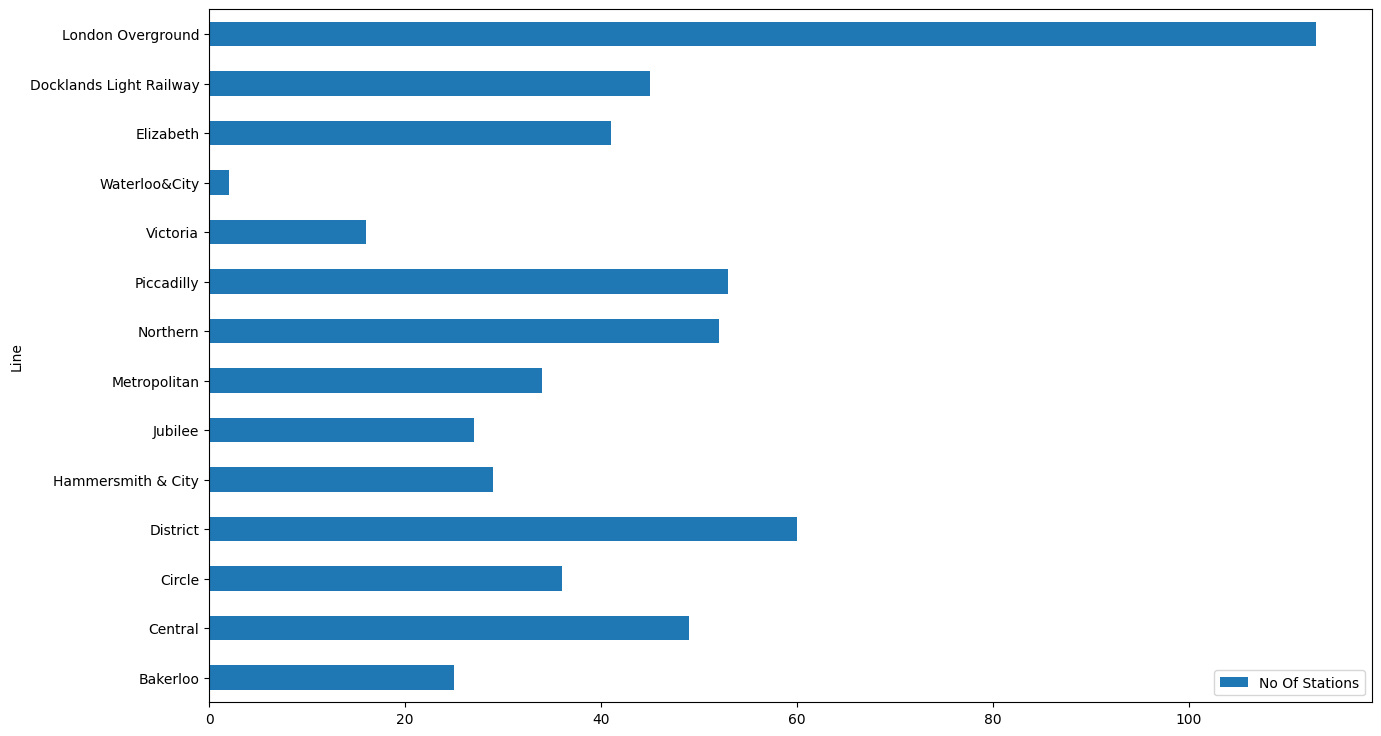

In [17]:
df.plot(kind='barh', x="Line", y="No Of Stations")

## 2. Practice

If you're not completely lost by the above, let's see if you can use pandas (or Excel to answer the following questions).
This is obviously a very small dataset, however the crypto data is much larger and you won't be able to easily do it by eye, so getting some practice of the tools will be very useful.



Questions
1. Which line is the oldest?

2. Excluding London Underground, what line has the most number of stations? 

3. Show a graph of the age of each tube line

3. Extension (change the graph above, with the stations of tube, into different colours)
You will have to look online for help with this, you can start here:
https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.plot.html

## 3. Crypto Data

Now the main task for your week is to analyse, produce graphs, interesting facts etc. from our crypto dataset.

In [23]:
df2 = pd.read_csv('data/crypto.csv')
df2

,Asset_Name,timestamp,Close
0,Bitcoin Cash,2018-01-01,2374.5900
1,Bitcoin Cash,2018-01-02,2323.3200
2,Bitcoin Cash,2018-01-03,2551.2850
3,Bitcoin Cash,2018-01-04,2557.6467
4,Bitcoin Cash,2018-01-05,2354.4433
...,...,...,...
18097,Dogecoin,2021-09-17,0.2416
18098,Dogecoin,2021-09-18,0.2401
18099,Dogecoin,2021-09-19,0.2413
18100,Dogecoin,2021-09-20,0.2331


If we use our `value_counts()` function from earlier, we can now see the different coins we have.

In [21]:
df2.value_counts('Asset_Name')

Asset_Name
Binance Coin        1360
Bitcoin             1360
Bitcoin Cash        1360
EOS.IO              1360
Ethereum            1360
Ethereum Classic    1360
Litecoin            1360
Monero              1360
TRON                1324
Stellar             1314
Cardano             1254
IOTA                1232
Maker               1204
Dogecoin             894
Name: count, dtype: int64

We have 14 different coins, with most coins having 1360 rows (prices) for them

Now we can use our lovely plot function, and produce a graph for Bitcoin

<Axes: xlabel='timestamp'>

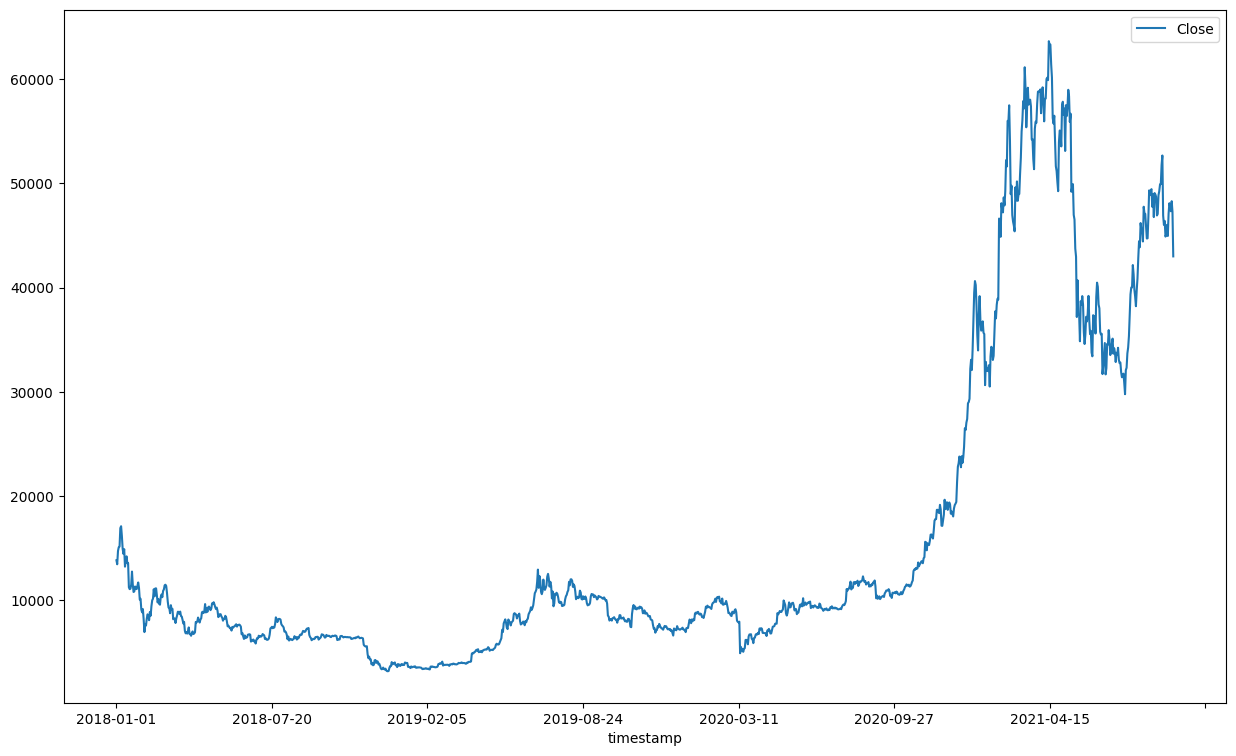

In [20]:
bitcoin = df2[df2['Asset_Name'] == 'Bitcoin']
bitcoin.plot(x='timestamp', y='Close')

### Your Task

1. Create interesting visualisations from the data (start with looking at other coins)
2. Come up with some interesting stats about the data (think, best ever day?)
3. Finally, come up with whatever you want, we want to see what you can do with the data!